Extract mel-spectrogram from audio

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
import numpy as np
import os

Find graphic specs

In [2]:
def load_data(dir_path):
   X = []
   y = []
   labels = ['PD', 'HC']
   for label in labels:
      path = os.path.join(dir_path, label)
      class_num = labels.index(label)
      for img in os.listdir(path):
         try:
               img_arr = img_to_array(load_img(os.path.join(path, img), target_size=(640, 480)))  # Convert image to array
               X.append(preprocess_input(img_arr))  # Preprocess the image using VGG16's preprocess_input method
               y.append(class_num)
         except Exception as e:
               print(e)
      try:
            return np.array(X), np.array(y)
      except Exception as e:
            print(f'Failed to create numpy arrays: {e}')
            return None, None

In [3]:
X, y = load_data('./plots/')
X = X.reshape(X.shape[0], -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reshape the data to be 3D for the LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Convert labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

train

In [4]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(2, activation='softmax')) 

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', Precision(), Recall()])


In [5]:
# Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss: %.2f" % scores[0])
print("Accuracy: %.2f%%" % (scores[1] * 100))
print("Precision: %.2f%%" % (scores[2] * 100))
print("Recall: %.2f%%" % (scores[3] * 100))

Epoch 1/10
1/1 [==============================] - 155s 155s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
1/1 [==============================] - 152s 152s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
1/1 [==============================] - 148s 148s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
1/1 [==============================] - 151s 151s/step - loss: 0.0000e+00 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
1/1 [==============================] - 147s 147s/step - loss: 0.0

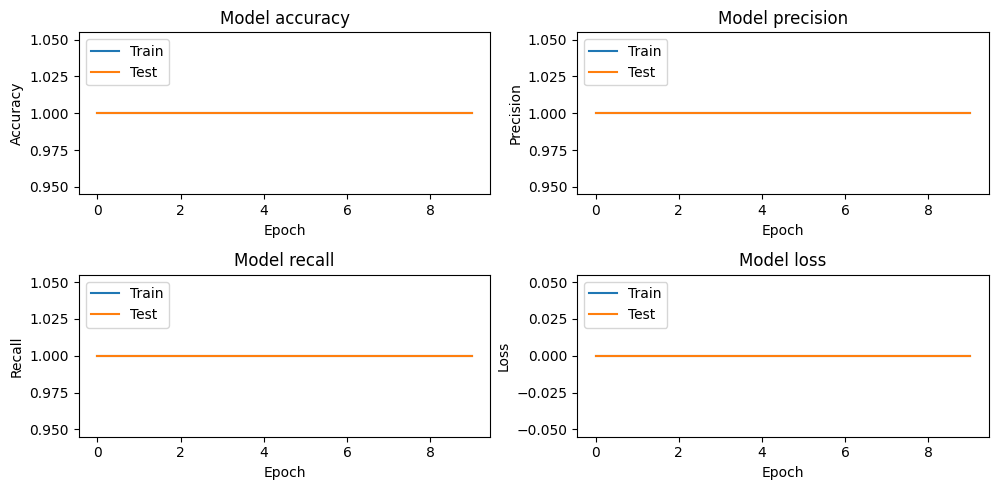

In [7]:
# Plotting accuracy, precision, recall and loss
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,3)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(2,2,4)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()